# linear regression

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#reading data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
#collecting X and Y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [5]:
# mean X and Y
mean_X=np.mean(X)
mean_Y=np.mean(Y)

#Total number of values
m=len(X)

#y=b1x+b0
#using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
    numer +=(X[i] - mean_X)*(Y[i] - mean_Y)
    denom +=(X[i] - mean_X)**2
b1 = numer/denom
b0=mean_Y-(b1*mean_X)

#print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


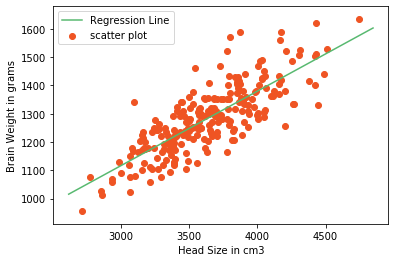

In [6]:
#plotting values and regression line

max_X=np.max(X)+100
min_X=np.min(X)-100

#calculating line values x and y
x=np.linspace(min_X,max_X,1000)
y=b0+b1*x

#ploting line
plt.plot(x,y,color='#58b970',label='Regression Line')
#plotting Scatter points
plt.scatter(X,Y,c='#ef5423',label='scatter plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [12]:
ss_t=0    #total sum of squares
ss_r=0    #total sum of square of residuals
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_Y)**2
    ss_r+=(y_pred-mean_Y)**2
r2=(ss_r/ss_t)
print(r2)

[0.63931172]


In [9]:
#this machine learning model using sciket learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn
X=X.reshape((m,1))

#creating model
reg =LinearRegression()

#Fitting training data
reg=reg.fit(X,Y)

# Y prediction
Y_pred=reg.predict(X)

#calcutating RMSE and R2 score
mse=mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score=reg.score(X,Y)

print(r2_score)

0.639311719957
